# 🚜🚜Predicting the sale price for bulldozers

## 1. Problem definition:
> How well can we predict the price of a bulldozer from the features given and the price for which previous bulldozers were sold?

## 2. Data:
> Data is downloaded from kaggle bluebook for Bulldozers:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

> The data for this competition is split into three parts:

   * Train.csv is the training set, which contains data through the end of 2011.
   * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
   * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
   
## 3. Evaluation:
The evaluation metric for this competition is RMSLE (root mean squared log error) between actual and predicted auction prices:

For more on evaluation:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

Our goal for this project is to build an ML model to minimize RMSLE.

## 4. Features:

> Kaggle provides data dictionary:
https://docs.google.com/spreadsheets/d/1_sIE9ytFO9gKymR0idgAu_Cohv6fkcPy/edit?usp=sharing&ouid=114876696848086981513&rtpof=true&sd=true

## 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand         saledate  ...  \
0           2004                      68.0       Low  11/16/2006 0:00  ...   
1           1996                    4640.0       Low   3/26/2004 0:00  ...   
2           2001                    2838.0      High   2/26/2004 0:00  ...   
3           2001                    3486.0      High   5/19/2011 0:00  ...   
4           2007                     722.0    Medium   7/23/2009 0:00  ...   
...          ...                       ...       ...              ...  ...   
412693      2005                       NaN       NaN    3/7/2012 0:00  ...   
412694      2005                       NaN       NaN   1/28/2012 0:00  ...   
412695      2005                       NaN       NaN   1/28/2012 0:00  ...   
412696      2006                       NaN       NaN    3/7/2012 0:00  ...   
412697      2006                       NaN       NaN   1/28/2012 0:00  ...   

       Undercarriage_Pad_Width         Stick_Length                Thumb  \
0                          NaN                  NaN                  NaN   
1                          NaN                  NaN                  NaN   
2                          NaN                  NaN                  NaN   
3                          NaN                  NaN                  NaN   
4                          NaN                  NaN                  NaN   
...                        ...                  ...                  ...   
412693     None or Unspecified  None or Unspecified  None or Unspecified   
412694     None or Unspecified  None or Unspecified  None or Unspecified   
412695     None or Unspecified  None or Unspecified  None or Unspecified   
412696     None or Unspecified  None or Unspecified  None or Unspecified   
412697     None or Unspecified  None or Unspecified  None or Unspecified   

            Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0                       NaN          NaN              NaN        NaN   
1                       NaN          NaN              NaN        NaN   
2                       NaN          NaN              NaN        NaN   
3                       NaN          NaN              NaN        NaN   
4                       NaN          NaN              NaN        NaN   
...                     ...          ...              ...        ...   
412693  None or Unspecified       Double              NaN        NaN   
412694  None or Unspecified       Double              NaN        NaN   
412695  None or Unspecified       Double              NaN        NaN   
412696  None or Unspecified       Double              NaN        NaN   
412697  None or Unspecified       Double              NaN        NaN   

       Travel_Controls Differential_Type Steering_Controls  
0                  NaN          Standard      Conventional  
1                  NaN          Standard      Conventional  
2                  NaN               NaN               NaN  
3                  NaN               NaN               NaN  
4                  NaN               NaN               NaN  
...           

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:>

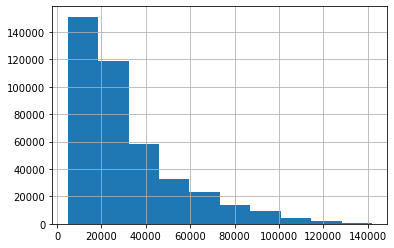

In [5]:
df.SalePrice.hist()

In [6]:
df.saledate.dtype

dtype('O')

In [7]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,parse_dates=['saledate'])
df

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
0           2004                      68.0       Low 2006-11-16  ...   
1           1996                    4640.0       Low 2004-03-26  ...   
2           2001                    2838.0      High 2004-02-26  ...   
3           2001                    3486.0      High 2011-05-19  ...   
4           2007                     722.0    Medium 2009-07-23  ...   
...          ...                       ...       ...        ...  ...   
412693      2005                       NaN       NaN 2012-03-07  ...   
412694      2005                       NaN       NaN 2012-01-28  ...   
412695      2005                       NaN       NaN 2012-01-28  ...   
412696      2006                       NaN       NaN 2012-03-07  ...   
412697      2006                       NaN       NaN 2012-01-28  ...   

       Undercarriage_Pad_Width         Stick_Length                Thumb  \
0                          NaN                  NaN                  NaN   
1                          NaN                  NaN                  NaN   
2                          NaN                  NaN                  NaN   
3                          NaN                  NaN                  NaN   
4                          NaN                  NaN                  NaN   
...                        ...                  ...                  ...   
412693     None or Unspecified  None or Unspecified  None or Unspecified   
412694     None or Unspecified  None or Unspecified  None or Unspecified   
412695     None or Unspecified  None or Unspecified  None or Unspecified   
412696     None or Unspecified  None or Unspecified  None or Unspecified   
412697     None or Unspecified  None or Unspecified  None or Unspecified   

            Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0                       NaN          NaN              NaN        NaN   
1                       NaN          NaN              NaN        NaN   
2                       NaN          NaN              NaN        NaN   
3                       NaN          NaN              NaN        NaN   
4                       NaN          NaN              NaN        NaN   
...                     ...          ...              ...        ...   
412693  None or Unspecified       Double              NaN        NaN   
412694  None or Unspecified       Double              NaN        NaN   
412695  None or Unspecified       Double              NaN        NaN   
412696  None or Unspecified       Double              NaN        NaN   
412697  None or Unspecified       Double              NaN        NaN   

       Travel_Controls Differential_Type Steering_Controls  
0                  NaN          Standard      Conventional  
1                  NaN          Standard      Conventional  
2                  NaN               NaN               NaN  
3                  NaN               NaN               NaN  
4                  NaN               NaN               NaN  
...                ...               ...               ...  
412693             NaN   

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

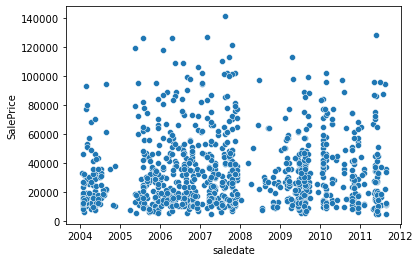

In [9]:
sns.scatterplot(x = 'saledate', y = 'SalePrice', data=df.head(1000))

In [10]:
# Copying the original dataframe:
df1 = df.copy()
df1.head()


SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [11]:
df1.sort_values(by= 'saledate', inplace = True, ascending=True)
df1.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
205615      1974                       NaN       NaN 1989-01-17  ...   
274835      1980                       NaN       NaN 1989-01-31  ...   
141296      1978                       NaN       NaN 1989-01-31  ...   
212552      1980                       NaN       NaN 1989-01-31  ...   
62755       1984                       NaN       NaN 1989-01-31  ...   

       Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer  \
205615                     NaN          NaN   NaN             NaN   
274835                     NaN          NaN   NaN             NaN   
141296                     NaN          NaN   NaN             NaN   
212552                     NaN          NaN   NaN             NaN   
62755                      NaN          NaN   NaN             NaN   

       Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
205615          NaN  None or Unspecified   Straight  None or Unspecified   
274835          NaN                  NaN        NaN                  NaN   
141296          NaN  None or Unspecified   Straight  None or Unspecified   
212552          NaN                  NaN        NaN                  NaN   
62755           NaN  None or Unspecified        PAT                Lever   

       Differential_Type Steering_Controls  
205615               NaN               NaN  
274835          Standard      Conventional  
141296               NaN               NaN  
212552          Standard      Conventional  
62755                NaN               NaN  

[5 rows x 53 columns]

# Extracting year, month, day from *saledate*

In [12]:
df1['SaleYear'] = df1.saledate.dt.year
df1['SaleMonth'] = df1.saledate.dt.month
df1['SaleDay'] = df1.saledate.dt.day
df1['SaleDayOfWeek'] = df1.saledate.dt.dayofweek
df1['SaleDayOfYear'] = df1.saledate.dt.dayofyear
df1.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
saledate                                                1989-01-17 00:00:00   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                         

In [13]:
# now we are going to drop saledate columns
df1.drop('saledate', inplace=True, axis=1)

## Converting 'Object'/str type columns into catagory

In [14]:
pd.api.types.is_string_dtype(df1['Steering_Controls'])

True

In [15]:
for column, data in df1.items():
    if pd.api.types.is_string_dtype(df1[column]):
        print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [16]:
for column, data in df1.items():
    if pd.api.types.is_string_dtype(data):
        df1[column] = data.astype('category').cat.as_ordered()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [18]:
df1.isnull().sum()*100/len(df1)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

## Filling missing values

### 1. numeric type missing values

In [19]:
for column, data in df1.items():
    if pd.api.types.is_numeric_dtype(data):
        print(column)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear


In [20]:
for column, data in df1.items():
    if pd.api.types.is_numeric_dtype(data):
        print(df1[column].isnull().sum())

0
0
0
0
0
20136
0
265194
0
0
0
0
0


### Filling null values in the numeric column with median values

In [21]:
for column, data in df1.items():
    if pd.api.types.is_numeric_dtype(data):
        if df1[column].isnull().any():
            df1[column+'is_missing'] = df1[column].isnull()
            df1[column].fillna(df1[column].median(), inplace = True)
            

#### Checking is any null values are left in the numeric columns


In [22]:
for column, data in df1.items():
    if pd.api.types.is_numeric_dtype(data):
        print(df1[column].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### 2. Categorical type missing values:

In [23]:
for column, data in df1.items():
    if not pd.api.types.is_numeric_dtype(data):
        print(df1[column].isnull().sum())

339028
0
0
140727
354031
337882
216605
0
0
0
0
305611
334
214983
331602
259970
331602
224691
331602
386715
386715
386715
386715
82565
386715
305753
386704
386715
315060
192019
367724
367823
367823
310505
309782
310437
310366
310437
310505
331986
330823
330821
341134
341176


### Turning categorical columns into numbers and fill missing

In [24]:
pd.Categorical(df['Coupler_System']).codes+1

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [25]:
for column, data in df1.items():
    if not pd.api.types.is_numeric_dtype(data):
        df1[column+ 'is_missing'] = df1[column].isnull()
        df1[column] = pd.Categorical(df1[column]).codes+1

In [26]:
df1['Blade_Type'].value_counts()

0     330823
6      39633
8      13461
5      11841
7       8907
10      3681
9       1888
1       1684
4        743
3         26
2         11
Name: Blade_Type, dtype: int64

In [27]:
df1.isnull().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [28]:
df1.T

205615   274835   141296   212552   62755   \
SalesID                      1646770  1821514  1505138  1671174  1329056   
SalePrice                     9500.0  14000.0  50000.0  16000.0  22000.0   
MachineID                    1126363  1194089  1473654  1327630  1336053   
ModelID                         8434    10150     4139     8591     4089   
datasource                       132      132      132      132      132   
...                              ...      ...      ...      ...      ...   
Backhoe_Mountingis_missing     False     True    False     True    False   
Blade_Typeis_missing           False     True    False     True    False   
Travel_Controlsis_missing      False     True    False     True    False   
Differential_Typeis_missing     True    False     True    False     True   
Steering_Controlsis_missing     True    False     True    False     True   

                              54653    81383    204924   135376   113390  ...  \
SalesID                      1301884  1379228  1645390  1493279  1449549  ...   
SalePrice                    23500.0  31000.0  11750.0  63000.0  13000.0  ...   
MachineID                    1182999  1082797  1527216  1363756  1289412  ...   
ModelID                         4123     7620     8202     2759     3356  ...   
datasource                       132      132      132      132      132  ...   
...                              ...      ...      ...      ...      ...  ...   
Backhoe_Mountingis_missing     False     True     True    False     True  ...   
Blade_Typeis_missing           False     True     True    False     True  ...   
Travel_Controlsis_missing      False     True     True    False     True  ...   
Differential_Typeis_missing     True    False    False     True     True  ...   
Steering_Controlsis_missing     True    False    False     True     True  ...   

                              409202   408976   411695   411319   408889  \
SalesID                      6283634  6282337  6311321  6306476  6281219   
SalePrice                    35000.0   7500.0  13000.0  53000.0  39000.0   
MachineID                    1930870  1928688  1823846  1278794  1792049   
ModelID                         4701    22072    17311     9114    13976   
datasource                       149      149      149      149      149   
...                              ...      ...      ...      ...      ...   
Backhoe_Mountingis_missing      True     True     True     True     True   
Blade_Typeis_missing            True     True     True     True     True   
Travel_Controlsis_missing       True     True     True     True     True   
Differential_Typeis_missing    False     True     True    False     True   
Steering_Controlsis_missing    False     True     True    False     True   

                              410879   412476   411927   407124   409203  
SalesID                      6302984  6324811  6313029  6266251  6283635  
SalePrice                    16000.0   6000.0  16000.0  55000.0  34000.0  
MachineID                    1915521  1919104  1918416   509560  1869284  
ModelID                         5266    19330    17244     3357     4701  
datasource                       149      149      149      149      149  
...                              ...      ...      ...      ...      ...  
Backhoe_Mountingis_missing     False     True     True     True     True  
Blade_Typeis_missing           False     True     True     True     True  
Travel_Controlsis_missing      False     True     True     True     True  
Differential_Typeis_missing     True     True     True     True    False  
Steering_Controlsis_missing     True     True     True     True    False  

[103 rows x 412698 columns]

In [29]:
### Building model
df1.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   

        YearMade  MachineHoursCurrentMeter  UsageBand  fiModelDesc  ...  \
205615      1974                       0.0          0         4593  ...   
274835      1980                       0.0          0         1820  ...   
141296      1978                       0.0          0         2348  ...   
212552      1980                       0.0          0         1819  ...   
62755       1984                       0.0          0         2119  ...   

        Undercarriage_Pad_Widthis_missing  Stick_Lengthis_missing  \
205615                               True                    True   
274835                               True                    True   
141296                               True                    True   
212552                               True                    True   
62755                                True                    True   

        Thumbis_missing  Pattern_Changeris_missing  Grouser_Typeis_missing  \
205615             True                       True                    True   
274835             True                       True                    True   
141296             True                       True                    True   
212552             True                       True                    True   
62755              True                       True                    True   

        Backhoe_Mountingis_missing  Blade_Typeis_missing  \
205615                       False                 False   
274835                        True                  True   
141296                       False                 False   
212552                        True                  True   
62755                        False                 False   

        Travel_Controlsis_missing  Differential_Typeis_missing  \
205615                      False                         True   
274835                       True                        False   
141296                      False                         True   
212552                       True                        False   
62755                       False                         True   

        Steering_Controlsis_missing  
205615                         True  
274835                        False  
141296                         True  
212552                        False  
62755                          True  

[5 rows x 103 columns]

In [30]:
df1_train = df1[df1['SaleYear']!=2012]
df1_valid = df1[df1['SaleYear']==2012]

In [31]:
len(df1_train), len(df1_valid)

(401125, 11573)

In [32]:
X_train, X_valid = df1_train.drop('SalePrice', axis=1), df1_valid.drop('SalePrice', axis=1)
y_train, y_valid = df1_train['SalePrice'], df1_valid['SalePrice']

## Building an evaluation metrics

In [33]:
from sklearn.metrics import mean_squared_log_error , mean_absolute_error, r2_score
def rmsle(y_test, y_preds):
    " Calculating root mean square error"
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {
        'Training MAE': mean_absolute_error(y_train, train_preds),
        'Vaalid MAE' : mean_absolute_error(y_valid, valid_preds),
        'TRAINING RMSLE' : rmsle(y_train, train_preds),
        'Valid RMSLE' : rmsle(y_valid, valid_preds),
        'Training R^2' : r2_score(y_train, train_preds),
        'Testing R^2' : r2_score(y_valid, valid_preds)
    }
    return scores

### Testing our model on a subset to test the hyperparameters

In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples= 10000)

In [35]:
%%time
model.fit(X_train, y_train)

CPU times: total: 56.3 s
Wall time: 4.34 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [36]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Vaalid MAE': 7177.26365505919,
 'TRAINING RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Testing R^2': 0.8320374995090507}

## Tuning hyperparameters with RandomizedSearchCV

In [37]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators' : np.arange(10,100,10),
           'max_depth' : np.array([3,5,10,25,50]),
           'min_samples_split' : np.arange(2,50,2),
           'min_samples_leaf' : np.arange(1,50,2),
           'max_features' : [0.5,1,'sqrt','auto'],
           'max_samples' : [10000]
    }
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), 
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\nehah\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': array([ 3,  5, 10, 25, 50]),
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [38]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 20,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 25}

In [39]:
show_scores(rs_model)

{'Training MAE': 6527.258247781724,
 'Vaalid MAE': 8112.002460520312,
 'TRAINING RMSLE': 0.29267415314046863,
 'Valid RMSLE': 0.3214947856186512,
 'Training R^2': 0.8080185473039739,
 'Testing R^2': 0.7767936494728415}

In [40]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
ideal_model.fit(X_train, y_train)

CPU times: total: 7min 5s
Wall time: 32 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [41]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Vaalid MAE': 5951.247761444453,
 'TRAINING RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Testing R^2': 0.8818019502450094}

### Making predictions on test data:

In [42]:
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates=['saledate'])
df_test

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3      1999   
1      1227844    1022817     7271         121             3      1000   
2      1227847    1031560    22805         121             3      2004   
3      1227848      56204     1269         121             3      2006   
4      1227863    1053887    22312         121             3      2005   
...        ...        ...      ...         ...           ...       ...   
12452  6643171    2558317    21450         149             2      2008   
12453  6643173    2558332    21434         149             2      2005   
12454  6643184    2558342    21437         149             2      1000   
12455  6643186    2558343    21437         149             2      2006   
12456  6643196    2558346    21446         149             2      2008   

       MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0                        3688.0       Low 2012-05-03        580G  ...   
1                       28555.0      High 2012-05-10         936  ...   
2                        6038.0    Medium 2012-05-10    EC210BLC  ...   
3                        8940.0      High 2012-05-10       330CL  ...   
4                        2286.0       Low 2012-05-10        650K  ...   
...                         ...       ...        ...         ...  ...   
12452                       NaN       NaN 2012-10-24       80NX3  ...   
12453                       NaN       NaN 2012-10-24         28N  ...   
12454                       NaN       NaN 2012-10-24         35N  ...   
12455                       NaN       NaN 2012-10-24         35N  ...   
12456                       NaN       NaN 2012-09-19        55N2  ...   

      Undercarriage_Pad_Width         Stick_Length                Thumb  \
0                         NaN                  NaN                  NaN   
1                         NaN                  NaN                  NaN   
2         None or Unspecified                9' 6"               Manual   
3         None or Unspecified  None or Unspecified               Manual   
4                         NaN                  NaN                  NaN   
...                       ...                  ...                  ...   
12452     None or Unspecified  None or Unspecified  None or Unspecified   
12453     None or Unspecified  None or Unspecified  None or Unspecified   
12454     None or Unspecified  None or Unspecified  None or Unspecified   
12455     None or Unspecified  None or Unspecified  None or Unspecified   
12456     None or Unspecified  None or Unspecified  None or Unspecified   

           Pattern_Changer Grouser_Type     Backhoe_Mounting Blade_Type  \
0                      NaN          NaN                  NaN        NaN   
1                      NaN          NaN                  NaN        NaN   
2      None or Unspecified       Double                  NaN        NaN   
3                      Yes       Triple                  NaN        NaN   
4                      NaN          NaN  None or Unspecified        PAT   
...                    ...          ...                  ...        ...   
12452  None or Unspecified       Double                  NaN        NaN   
12453  None or Unspecified       Double                  NaN        NaN   
12454  None or Unspecified       Double                  NaN        NaN   
12455  None or Unspecified       Double                  NaN        NaN   
12456  None or Unspecified       Double                  NaN        NaN   

           Travel_Controls Differential_Type Steering_Controls  
0                      NaN               NaN               NaN  
1                      NaN          Standard      Conventional  
2                      NaN               NaN               NaN  
3                      NaN               NaN               NaN  
4      None or Unspecified               NaN               NaN  
...                    ...               ...     

## Preprocessing Test data

In [43]:
def preprocess(df):
    df['SaleYear'] = df['saledate'].dt.year
    df['SaleMonth'] = df['saledate'].dt.month
    df['SaleDay'] = df['saledate'].dt.day
    df['SaleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['SaleDayOfYear'] = df['saledate'].dt.dayofyear
    df.drop('saledate', inplace=True, axis=1)
    
    for column, data in df.items():
        if pd.api.types.is_string_dtype(data):
            df[column] = data.astype('category').cat.as_ordered()
        
    
    for column, data in df.items():
        if pd.api.types.is_numeric_dtype(data):
            if df[column].isnull().any():
                df[column+'is_missing'] = df[column].isnull()
                df[column].fillna(df[column].median(), inplace = True)
            
    for column, data in df.items():
        if not pd.api.types.is_numeric_dtype(data):
            df[column+ 'is_missing'] = df[column].isnull()
            df[column] = pd.Categorical(df[column]).codes+1
    return df

In [44]:
df_test = preprocess(df_test)
df_test

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3      1999   
1      1227844    1022817     7271         121             3      1000   
2      1227847    1031560    22805         121             3      2004   
3      1227848      56204     1269         121             3      2006   
4      1227863    1053887    22312         121             3      2005   
...        ...        ...      ...         ...           ...       ...   
12452  6643171    2558317    21450         149             2      2008   
12453  6643173    2558332    21434         149             2      2005   
12454  6643184    2558342    21437         149             2      1000   
12455  6643186    2558343    21437         149             2      2006   
12456  6643196    2558346    21446         149             2      2008   

       MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                        3688.0          2          499          180  ...   
1                       28555.0          1          831          292  ...   
2                        6038.0          3         1177          404  ...   
3                        8940.0          1          287          113  ...   
4                        2286.0          2          566          196  ...   
...                         ...        ...          ...          ...  ...   
12452                    3525.0          0          713          235  ...   
12453                    3525.0          0          186           80  ...   
12454                    3525.0          0          325          123  ...   
12455                    3525.0          0          325          123  ...   
12456                    3525.0          0          483          171  ...   

       Undercarriage_Pad_Widthis_missing  Stick_Lengthis_missing  \
0                                   True                    True   
1                                   True                    True   
2                                  False                   False   
3                                  False                   False   
4                                   True                    True   
...                                  ...                     ...   
12452                              False                   False   
12453                              False                   False   
12454                              False                   False   
12455                              False                   False   
12456                              False                   False   

       Thumbis_missing  Pattern_Changeris_missing  Grouser_Typeis_missing  \
0                 True                       True                    True   
1                 True                       True                    True   
2                False                      False                   False   
3                False                      False                   False   
4                 True                       True                    True   
...                ...                        ...                     ...   
12452            False                      False                   False   
12453            False                      False                   False   
12454            False                      False                   False   
12455            False                      False                   False   
12456            False                      False                   False   

       Backhoe_Mountingis_missing  Blade_Typeis_missing  \
0                            True                  True   
1                            True                  True   
2                            True                  True   
3                            True                  True   
4                           False                 False   
...                           ...                   ...   
12452                        True     

In [45]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerIDis_missing'}

In [46]:
df_test['auctioneerIDis_missing'] = False

In [47]:
## Now we have same columns in train and test data

In [48]:
test_preds = ideal_model.predict(df_test)

C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [49]:
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [50]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

SalesID    SalesPrice
0      1227829  20614.367809
1      1227844  19897.801707
2      1227847  44852.219594
3      1227848  68346.325323
4      1227863  39487.349708
...        ...           ...
12452  6643171  46466.092910
12453  6643173  17500.493352
12454  6643184  14296.986205
12455  6643186  22164.857577
12456  6643196  31683.800634

[12457 rows x 2 columns]

In [51]:
df_preds.to_csv("test_predictions.csv")

## Feature Prediction

In [52]:
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [54]:
feature_imp = pd.DataFrame()
feature_imp['Feature'] = X_train.columns
feature_imp['Imp_value'] = ideal_model.feature_importances_

In [55]:
top_20_features = feature_imp.sort_values(by = 'Imp_value', ascending=False)[:20]
top_20_features

Feature  Imp_value
5                   YearMade   0.208201
13               ProductSize   0.152517
51                  SaleYear   0.074242
10           fiSecondaryDesc   0.062382
19                 Enclosure   0.061711
14        fiProductClassDesc   0.047222
9                fiBaseModel   0.047191
8                fiModelDesc   0.041612
2                    ModelID   0.040917
64     ProductSizeis_missing   0.034848
0                    SalesID   0.033945
1                  MachineID   0.018115
37            Coupler_System   0.015710
12         fiModelDescriptor   0.015252
88  Coupler_Systemis_missing   0.011348
55             SaleDayOfYear   0.009833
27               Blade_Width   0.006634
35                 Tire_Size   0.006042
15                     state   0.005968
53                   SaleDay   0.005676

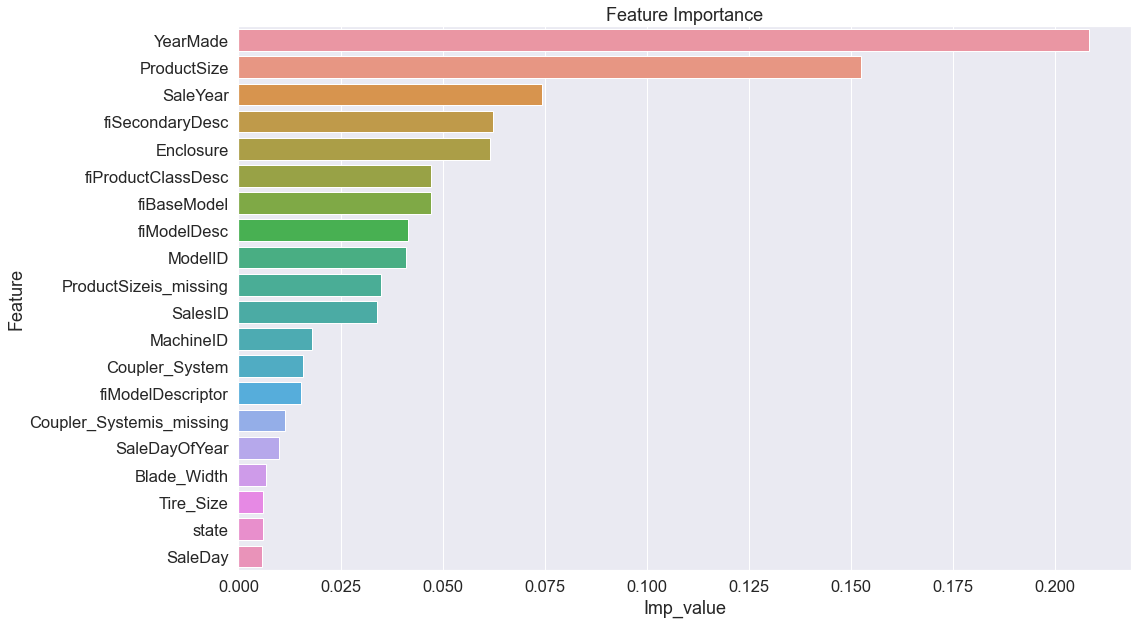

In [57]:
plot = sns.barplot(y = top_20_features['Feature'], x =top_20_features['Imp_value']).set(title='Feature Importance')
sns.set(rc = {'figure.figsize':(16,10)})
sns.set(font_scale=1.5)